In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1]]
X,y = datasets.make_blobs(n_samples = n_pts,
                          random_state = 123,
                          centers = centers,
                         cluster_std = 0.4)


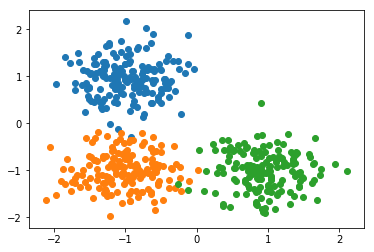

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [5]:
print(y)
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [6]:
model = Sequential()
model.add(Dense(3,input_shape=  (2,),activation = 'softmax'))
model.compile(Adam(0.1), loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x = X, y= y_cat, verbose = 1, batch_size = 50, epochs = 50)

Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 0.3675 - acc: 0.9120
Epoch 2/50
500/500 [==============================] - 0s 76us/step - loss: 0.1362 - acc: 0.9900
Epoch 3/50
500/500 [==============================] - 0s 104us/step - loss: 0.0805 - acc: 0.9880
Epoch 4/50
500/500 [==============================] - 0s 83us/step - loss: 0.0619 - acc: 0.9900
Epoch 5/50
500/500 [==============================] - 0s 102us/step - loss: 0.0540 - acc: 0.9900
Epoch 6/50
500/500 [==============================] - 0s 92us/step - loss: 0.0489 - acc: 0.9880
Epoch 7/50
500/500 [==============================] - 0s 96us/step - loss: 0.0463 - acc: 0.9880
Epoch 8/50
500/500 [==============================] - 0s 102us/step - loss: 0.0439 - acc: 0.9880
Epoch 9/50
500/500 [==============================] - 0s 140us/step - loss: 0.0420 - acc: 0.9880
Epoch 10/50
500/500 [==============================] - 0s 114us/step - loss: 0.0405 - acc: 0.9880
Epoch 11/50
500/500 [==============

In [7]:
def descision_boundary(X,y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    predictions = model.predict_classes(grid)

    z = predictions.reshape(xx.shape)
   
    plt.contourf(xx,yy,z)

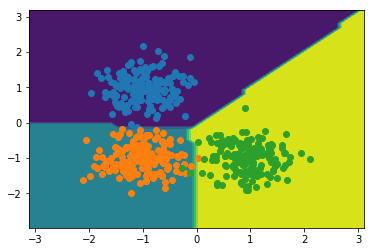

In [8]:
descision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])